Non-Linear Curve Fitting, Part 1
=========================

<div class="overview-this-is-a-title overview">
<p class="overview-title">Overview</p>
<p>Questions</p>
    <ul>
        <li>How can I analyze enzyme kinetics data in Python?</li>
        <li>What is the process for non-linear least squares curve fitting in Python?</li>
    </ul>
<p>Objectives:</p>
    <ul>
        <li> Create a pandas dataframe with enzyme kinetics data from a .csv file</li>
        <li> Add velocity calculations to the dataframe</li>
        <li> Perform the non-linear regression calculations</li>
    </ul>
    
<p>In this module, we will calculate initial rates from the raw data (&Delta;A<sub>405</sub>) in an enzyme kinetics experiment with alkaline phosphatase. In the process, we will import the raw data into a pandas dataframe, use some pandas tools to reorganize the data, produce a second pandas dataframe that contains the substrate concentrations and initial rates at each concentration. Finally, we will export this information to a csv file to use in the next module, where you will explore nonlinear curve fitting in python.
    </p>
</div>

### Navigating the command line
We start by importing data from a csv file as we did earlier with the data for linear regression. These data represent the rate of p-nitrophenol appearance for a series of p-nitrophenol phosphate concentrations in the presence of alkaline phosphatase. We will import the libraries we need, import the data and set up a pandas dataframe.

In [78]:
# import the libraries we need
import os # to create a filehandle for the .csv file
import pandas as pd # for importing the .csv file and creating a dataframe
from scipy import stats # for performing non-linear regression

In [79]:
# Create the filehandle for the csv file that contains your data
datafile = os.path.join('data', 'AP_kin.csv') # filehandle created
print(datafile)  # filehandle confirmed

data/AP_kin.csv


### Creating the pandas dataframe
The filehandle, `datafile`, points to a csv file that contains the raw kinetics data. As we saw in the `Working with Pandas` module, the pandas library has a tool for creating a dataframe from an existing csv file. Notice that the variable for the dataframe is called AP_kin_df. The `_df` at the end of the variable name is a reminder that this is a pandas dataframe.

In [80]:
# Creating the pandas dataframe using read_csv
AP_kin_df = pd.read_csv(datafile)
AP_kin_df.head()  # looking at the first five rows of the dataframe 

,Time (min),20.0,10.0,7.0,4.0,2.0,1.0,0.7,0.4,0.2,0.1,0.05
0,0.25,0.127118,0.121434,0.123059,0.103351,0.088046,0.062613,0.051681,0.034661,0.019578,0.020353,0.005635
1,0.50,0.269802,0.257587,0.239086,0.210920,0.177801,0.122747,0.104366,0.068643,0.040318,0.040318,0.011162
2,0.75,0.373572,0.364301,0.369177,0.313216,0.246186,0.193419,0.147517,0.099906,0.059896,0.056988,0.016580
3,1.00,0.518850,0.500455,0.468796,0.400747,0.352183,0.257892,0.194682,0.134567,0.073658,0.075985,0.022757
4,1.25,0.616135,0.613302,0.556695,0.500934,0.444503,0.309966,0.258405,0.173306,0.099827,0.100796,0.027092


When you look at this dataframe, notice that the index (the item at the far left of each row) is an integer. In this case, we want to use the 'Time (min)' values that are found in the first series as the index. There is a simple fix - the set_index function. 

```python
AP_kin_df.set_index('Time (min)', inplace=True)
```

By making the time values the index for each row, we can easily omit them from our initial rate calculations. We use the `inplace=True` option to make the change to the dataframe permanent.

In [81]:
AP_kin_df.set_index('Time (min)', inplace=True)
AP_kin_df.head()

,20.0,10.0,7.0,4.0,2.0,1.0,0.7,0.4,0.2,0.1,0.05
Time (min),,,,,,,,,,,
0.25,0.127118,0.121434,0.123059,0.103351,0.088046,0.062613,0.051681,0.034661,0.019578,0.020353,0.005635
0.50,0.269802,0.257587,0.239086,0.210920,0.177801,0.122747,0.104366,0.068643,0.040318,0.040318,0.011162
0.75,0.373572,0.364301,0.369177,0.313216,0.246186,0.193419,0.147517,0.099906,0.059896,0.056988,0.016580
1.00,0.518850,0.500455,0.468796,0.400747,0.352183,0.257892,0.194682,0.134567,0.073658,0.075985,0.022757
1.25,0.616135,0.613302,0.556695,0.500934,0.444503,0.309966,0.258405,0.173306,0.099827,0.100796,0.027092


### Datatype
Before we calculate the slopes to get initial velocities, we need to check for the datatypes on the numbers. We must ensure that the numbers are floats, rather than strings, so we can do calculations on them.

In [82]:
AP_kin_df.index.dtype # checking to see if the numbers are strings or floats

dtype('float64')

### Calculating the initial velocity
The index for each row is the time, which will be the x values to get the slope of each line. The values in each column are the absorbance values at each time point, so those will be our y values. Now we need to follow these steps to calculate the initial velocity at each substrate concentration. 
1. Inspect the data.
1. Create a second dataframe with the substrate concentration as the index.
1. Calculate the slopes from the first dataframe and add those as a column to the second dataframe.
1. Calculate the initial velocity by dividing the slope by the extinction coefficient for p-nitrophenol under these buffer conditions, 15.0 mM<sup>-1</sup>cm<sup>-1</sup>.
1. Export the second dataframe to a csv file that we will use in the next module.

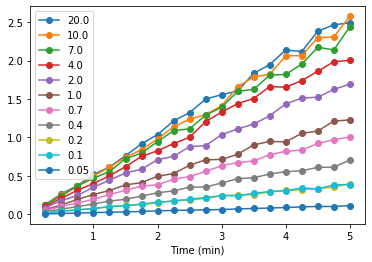

In [52]:
# Inspect the data using the plot command that is available with the dataframe
# We use the plot function that is built into pandas for this simple data display
AP_kin_df.plot(marker = 'o')

In [84]:
# Create a second dataframe with the substrate concentration as the index.
# Note the syntax for this pandas function - the D and F are capitalized.
MM_df = pd.DataFrame()

### Calculate the Slopes


In [85]:
# Calculate the slopes from the first dataframe 
# and add those as a column to the second dataframe.

There is some scatter in the data, but generally, the slopes of the curves increase with increasing substrate concentration.

Now we want to calculate the slope for each column. We can use the "apply" function to do this. Apply takes all of the row or column values and applies a function. There is a bit of a challenge here. We want to use the `linregress` function from scipy.stats to get the slopes. We used this function in the linear regression module and it returned five values: slope, intercept, r-value, p-value, and standard error for the best-fit line. So we need to define a new function that returns only the slope from `stats.linregress`. Here is the typical syntax for a function:

```python
# function definition
def function_name(parameters to be passed to the function):
    python code to be executed (must be indented following the colon)
    return function_output
```
Here is the syntax to call the function. It is just like the syntax we use to call a function from a library. 

```python
# function call
function_name(parameters to be passed to the function)
```

We will use this approach to define a function which returns only the slope. It will take in a pandas series, which always includes an index and a column. We have set the index (times) to be the x-values for the linear regression fit, so we just need to give a series that represents the y-values to this function.


In [64]:
slopes = []
for column in AP_kin_df.columns:
    slope, _, _, _, _, = stats.linregress(AP_kin_df.index, AP_kin_df[column])
    slopes.append(slope)
    
slopes

[0.5140907641142858,
 0.5031401632390977,
 0.4704346427639096,
 0.4170212341052633,
 0.34244478125714295,
 0.24625953559097755,
 0.20284295232781954,
 0.1364430576421053,
 0.0764421395849624,
 0.07806979615939852,
 0.022319351245112782]

In [68]:
# Create an empty dataframe
MM_df = pd.DataFrame() 
# Note the syntax for this pandas function - the D and F are capitalized.
MM_df['pNPP (mM)'] = AP_kin_df.columns
MM_df['slopes'] = slopes
MM_df

,pNPP (mM),slopes
0,20.0,0.514091
1,10.0,0.503140
2,7.0,0.470435
3,4.0,0.417021
4,2.0,0.342445
5,1.0,0.246260
6,0.7,0.202843
7,0.4,0.136443
8,0.2,0.076442
9,0.1,0.078070


In [72]:
# Calculate initial velocities and place those in a new column in the dataframe
MM_df['initial velocities'] = MM_df['slopes'] / 0.015
MM_df

,pNPP (mM),slopes,initial velocities
0,20.0,0.514091,34.272718
1,10.0,0.503140,33.542678
2,7.0,0.470435,31.362310
3,4.0,0.417021,27.801416
4,2.0,0.342445,22.829652
5,1.0,0.246260,16.417302
6,0.7,0.202843,13.522863
7,0.4,0.136443,9.096204
8,0.2,0.076442,5.096143
9,0.1,0.078070,5.204653


In [76]:
pwd

'/Users/pac8612/Desktop/python-scripting-biochemistry/biochemist-python/chapters'

We will use this dataframe now to perform the nonlinear regression fit using the SciPy library in part 2 of this lesson. To save this data for part 2, so we need to write it to a csv file in our data directory.

In [77]:
MM_df.to_csv('data/MM_data1.csv')

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Check your understanding</p>
    <p>You will find an Excel file in your data folder, chymotrypsin_kinetics.xlsx, with some kinetic data from a chymotrypsin experiment. Apply the principles above to create dataframes and a .csv file for creating a Michaelis-Menten plot with these data. Under these assay conditions the extinction coefficient for p-nitrophenol is 18,320 M<sup>-1</sup>cm<sup>-1</sup>.</p>

```{admonition} Hint
:class: dropdown
    You will need to get the data into a layout and file format that is easily read by pandas. 
    <ul>
        <li>Delete the first seven lines of the Excel file.</li>
        <li>Delete the first column of the Excel file.</li>
        <li>Save the file as chymotrypsin_kinetics.csv.</li>
        <li>Your data will should look something like this:</li>
        <img src="biochemist-python/chapters/images/csv_image.png" alt="csv image">
    
```{admonition} Solution
:class: dropdown
    
```python
        import os 
        import pandas as pd 
        import numpy as np 
        from scipy import stats 
        datafile = os.path.join('biochemist-python', 'chapters', 'data', 'chymotrypsin_kinetics.csv') # filehandle created
        chymo_rates_df = pd.read_csv(datafile)
        chymo_rates_df = chymo_rates_df.set_index('Time (sec)')
        
        def linregress_slope(df_series):
            slope, _, _, _, _, = stats.linregress(df_series.index, df_series.values)
            return slope

        chymo_MM_df = pd.DataFrame()
        chymo_MM_df['slopes'] = chymo_rates_df.apply(linregress_slope)
        chymo_MM_df['Initial Velocities'] = chymo_MM_df['slopes'] / 0.01832
        chymo_MM_df.to_csv('biochemist-python/chapters/data/chymo_MM_data.csv')
        print(chymo_MM_df)
    
```
The solution is in the next cell. We will remove that cell before we publish the final Jupyter book.
        
</div>


In [43]:
import os 
import pandas as pd 
import numpy as np 
from scipy import stats 
datafile = os.path.join('biochemist-python', 'chapters', 'data', 'chymotrypsin_kinetics.csv') # filehandle created
chymo_rates_df = pd.read_csv(datafile)
chymo_rates_df = chymo_rates_df.set_index('Time (sec)')

def linregress_slope(df_series):
  slope, _, _, _, _, = stats.linregress(df_series.index, df_series.values)
  return slope

chymo_MM_df = pd.DataFrame()
chymo_MM_df['slopes'] = chymo_rates_df.apply(linregress_slope)
chymo_MM_df['Initial Velocities'] = chymo_MM_df['slopes'] / 0.01832 
chymo_MM_df.to_csv('biochemist-python/chapters/data/chymo_MM_data.csv')
print(chymo_MM_df)

              slopes  Initial Velocities
1           0.000557            0.030412
0.5         0.000539            0.029437
0.25        0.000500            0.027293
0.125       0.000450            0.024563
0.0625      0.000511            0.027877
0.03125     0.000493            0.026903
0.015625    0.000357            0.019495
0.0078125   0.000229            0.012477
0.00390625  0.000111            0.006043
0.00195313  0.000071            0.003899
